In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
import importlib
utils = importlib.import_module('utils')
importlib.reload(utils)
from utils import *

In [3]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fs = 14

Load the data

In [4]:
# ISGRI: 15 - 30 keV
cr1, vr1, sg1, xp1, acr1, avr1, cr1_cpsf, cr1_psf, err1_cpsf, err1_psf, date1, end1, _ = loadCrabIMG("../data/Crab/15-30keV/Images", fitting=True)
lc1, lc1_err, lc1_date = loadCrabLC("../data/Crab/15-30keV/Lightcurves")

# ISGRI: 30 - 60 keV
cr2, vr2, sg2, xp2, acr2, avr2, cr2_cpsf, cr2_psf, err2_cpsf, err2_psf, date2, end2, _ = loadCrabIMG("../data/Crab/30-60keV/Images", fitting=True)

# JEM-X: 3 - 15 keV
cr3, vr3, sg3, xp3, acr3, avr3, cr3_cpsf, cr3_psf, err3_cpsf, err3_psf, date3, end3, _ = loadCrabIMG("../data/Crab/3-15keV/Images", fitting=True)

/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:321: OptimizeWarning: Covariance of the parameters could not be estimated
  popt2, pcov2 = curve_fit(Gaussian2D, xy, z, p0=[cr, x_int, y_int,  np.sqrt(vr),  np.sqrt(vr), 0, 0])
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:320: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(Gaussian2D_fixed, xy, z, p0=[cr, x_int, y_int])


/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:44: RuntimeWarning: invalid value encountered in scalar divide
  a = (np.cos(theta)**2)/(2*sigma_x**2) + (np.sin(theta)**2)/(2*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:45: RuntimeWarning: invalid value encountered in scalar divide
  b = -(np.sin(2*theta))/(4*sigma_x**2) + (np.sin(2*theta))/(4*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:46: RuntimeWarning: invalid value encountered in scalar divide
  c = (np.sin(theta)**2)/(2*sigma_x**2) + (np.cos(theta)**2)/(2*sigma_y**2)
/home/hthums/master_projects/jupiter-xray-analysis/jupiter-xrays/utils.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  c = (np.

Error processing file ../data/Crab/3-15keV/Images/268600140010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/054100190010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/036500830010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/060500110010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/048300560010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/101900900010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/077400150010.001mosaic.fits: list index out of range
Error processing file ../data/Crab/3-15keV/Images/035200470010.001mosaic.fits: list index out of range


In [32]:
len(os.listdir("../data/Crab/30-60keV/Images"))

93

In [5]:
# Total durations for each energy band
dur1 = [end - start for end, start in zip(Time(end1).unix, Time(date1).unix)]
total_duration1 = np.sum(dur1)
print(f'Total duration for 15-30 keV: {total_duration1/1000:.0f} ks')
print(f'Number of scws for 15-30 keV: {len(date1)}')

dur2 = [end - start for end, start in zip(Time(end2).unix, Time(date2).unix)]
total_duration2 = np.sum(dur2)
print(f'Total duration for 30-60 keV: {total_duration2/1000:.0f} ks')
print(f'Number of scws for 30-60 keV: {len(date2)}')

dur3 = [end - start for end, start in zip(Time(end3).unix, Time(date3).unix)]
total_duration3 = np.sum(dur3)
print(f'Total duration for 3-15 keV: {total_duration3/1000:.0f} ks')
print(f'Number of scws for 3-15 keV: {len(date3)}')

Total duration for 15-30 keV: 140 ks
Number of scws for 15-30 keV: 73
Total duration for 30-60 keV: 177 ks
Number of scws for 30-60 keV: 93
Total duration for 3-15 keV: 129 ks
Number of scws for 3-15 keV: 70


Prepare data for plotting and analysis

In [6]:
# Parse times
img_times1 = np.array([datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date1])
lc_times1 = np.array([datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in lc1_date])

# Mask where all data are non-zero
mask_img = cr1 != 0
mask_lc = lc1 != 0

# Apply mask
cr1 = cr1[mask_img]
acr1 = acr1[mask_img]
cr1_psf = cr1_psf[mask_img]
cr1_cpsf = cr1_cpsf[mask_img]
vr1 = vr1[mask_img]
avr1 = avr1[mask_img]
img_times1 = img_times1[mask_img]

lc1 = lc1[mask_lc]
lc1_err = lc1_err[mask_lc]
lc_times1 = lc_times1[mask_lc]

# Averages and std deviations
avg_cr1 = np.mean(cr1)
std_cr1 = np.std(cr1)
avg_psf1 = np.mean(cr1_psf)
std_psf1 = np.std(cr1_psf)
avg_cpsf1 = np.mean(cr1_cpsf)
std_cpsf1 = np.std(cr1_cpsf)
avg_lc1 = np.mean(lc1)
std_lc1 = np.std(lc1)

# Sort both time arrays along with their corresponding data arrays
sorted_img_times1, sorted_cr1, sorted_vr1 = zip(*sorted(zip(img_times1, cr1, vr1)))
sorted_lc_times1, sorted_lc1, sorted_lc1_err = zip(*sorted(zip(lc_times1, lc1, lc1_err)))

# Convert to NumPy arrays
sorted_img_times1 = np.array(sorted_img_times1)
sorted_cr1 = np.array(sorted_cr1)
sorted_vr1 = np.array(sorted_vr1)
sorted_lc_times1 = np.array(sorted_lc_times1)
sorted_lc1 = np.array(sorted_lc1)
sorted_lc1_err = np.array(sorted_lc1_err)

# Calculate offsets and mean
offsets = sorted_lc1 - sorted_cr1
avg_offset = np.mean(offsets)

# Yearly averages of cr1
yearly_avg_cr1 = []
yearly_avg_vr1 = []

# Group by year
for year in range(2004, 2024):
    # Get the indices of the dates that fall within the current year
    indices = [i for i, date in enumerate(sorted_img_times1) if date.year == year]
    
    # Calculate the average for the current year
    if indices:
        yearly_avg_cr1.append(np.mean(sorted_cr1[indices][sorted_cr1[indices] > 0]))
        yearly_avg_vr1.append(np.mean(sorted_vr1[indices][sorted_vr1[indices] > 0]))
    else:
        yearly_avg_cr1.append(np.nan)
        yearly_avg_vr1.append(np.nan)


### 15 - 30 keV

In [7]:
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

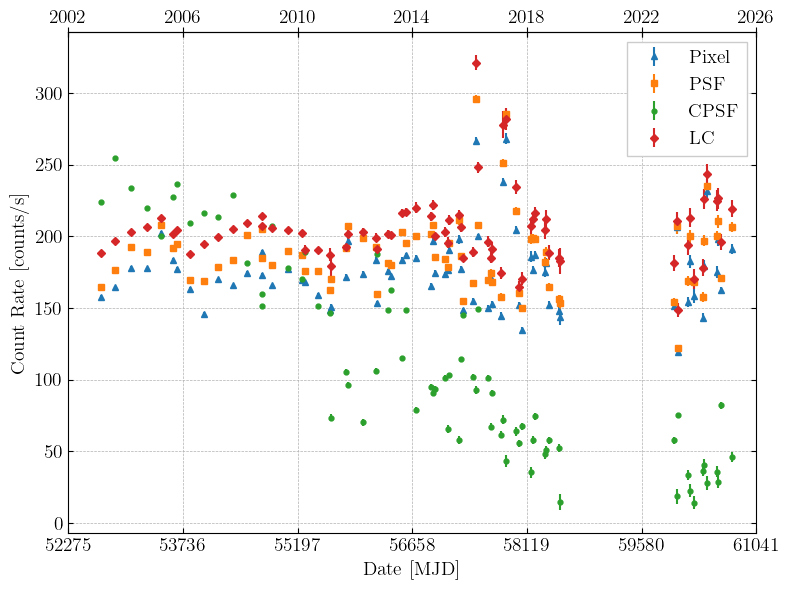

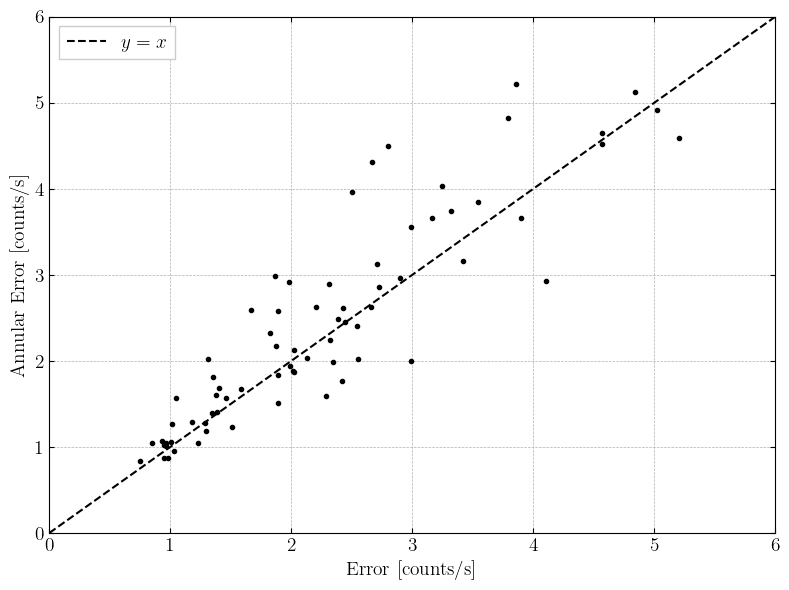

In [13]:
# --- Count Rate vs Time Plot ---
plt.figure(figsize=(8, 6))

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

colors = plt.get_cmap('tab20').colors

plt.errorbar(img_times1, cr1, yerr=np.sqrt(vr1), color=colors[0], fmt='^', capsize=0, label=r'Pixel', markersize=4)
plt.errorbar(img_times1, cr1_psf, yerr=np.sqrt(vr1), color=colors[2], fmt='s', capsize=0, label=r'PSF', markersize=4)
plt.errorbar(img_times1, cr1_cpsf, yerr=np.sqrt(vr1), color=colors[4], fmt='.', capsize=0, label=r'CPSF', markersize=7)
plt.errorbar(lc_times1, lc1, yerr=lc1_err, color=colors[6], fmt='D', capsize=0, label=r'LC', markersize=4)

# Horizontal average lines
#plt.axhline(avg_cr1, color='indianred', linestyle='--')
#plt.axhline(avg_psf1, color='limegreen', linestyle='-.')
#plt.axhline(avg_cpsf1, color='royalblue', linestyle=':')
#plt.axhline(avg_lc1, color='darkorange', linestyle='-.')

plt.xlabel(r'Date [MJD]', fontsize=fs)
plt.ylabel(r'Count Rate [counts/s]', fontsize=fs)
#plt.xticks(rotation=45)

ax = plt.gca()

# Choose tick positions at years 2004, 2008, ..., 2024
target_years = np.arange(2002, 2027, 4)
target_dates = [mdates.date2num(datetime(year, 1, 1)) for year in target_years]

# Apply ticks to both axes
ax.set_xticks(target_dates)

# Format bottom x-axis (MJD)
def mpl_date_to_mjd(x, pos):
    dt = mdates.num2date(x)
    mjd = Time(dt).mjd
    return f"{mjd:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(mpl_date_to_mjd))
ax.tick_params(which='both', direction='in', labelsize=14)

# Secondary x-axis for years
secax = ax.secondary_xaxis('top')
secax.set_xticks(target_dates)

def format_year(x, pos):
    dt = mdates.num2date(x)
    return dt.strftime('%Y')

secax.xaxis.set_major_formatter(FuncFormatter(format_year))
secax.tick_params(which='both', direction='in', labelsize=14)
secax.xaxis.set_ticks_position('both')
secax.yaxis.set_ticks_position('both')
secax.grid(True, which='both', linestyle='--', linewidth=0.5)

xmin = mdates.date2num(datetime(2002, 1, 1))
xmax = mdates.date2num(datetime(2026, 1, 1))
ax.set_xlim(xmin, xmax)

# Standardized ticks and layout
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc=1, fancybox=False, framealpha=1.0)
plt.tight_layout()

#from datetime import timedelta

#plt.xlim(Time('2003-01-01').datetime, Time('2023-01-01').datetime)
#xtimes = [Time('2003-01-01').datetime + timedelta(days=2 * 365 * i) for i in range(12)]
#xnames = [str(year) for year in range(2003, 2026, 2)]
#plt.xticks(xtimes, xnames, fontsize=14)

plt.savefig('../data/Figures/Crab-15-30-raw-LC.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-15-30-raw-LC.pdf', dpi=300, bbox_inches='tight')


# --- Error vs Annular Error Plot ---
plt.figure(figsize=(8, 6))

x = np.linspace(0, np.max(np.sqrt(vr1))+1, 100)
plt.plot(x, x, color='k', linestyle='--', label=r'$y = x$')
plt.errorbar(np.sqrt(vr1), np.sqrt(avr1), fmt='.', capsize=5, color='k')

plt.ylim(0, 6)
plt.xlim(0, 6)

plt.xlabel(r'Error [counts/s]', fontsize=fs)
plt.ylabel(r'Annular Error [counts/s]', fontsize=fs)

plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc=0, fancybox=False, framealpha=1.0)
plt.tight_layout()

plt.savefig('../data/Figures/Crab-15-30-error-comparison.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-15-30-error-comparison.pdf', dpi=300, bbox_inches='tight')

In [54]:
# Your existing code:
df = pd.DataFrame({
    'date': img_times1,
    'flux': cr1
})
df['year'] = df['date'].dt.year

# Group by year and compute mean flux
yearly_flux = df.groupby('year')['flux'].mean()

# Sort by year
yearly_flux = yearly_flux.sort_index()

# Compute year-over-year percentage variation
percent_variations = 100 * (yearly_flux.diff() / yearly_flux.shift(1)).dropna()

# Compute means for different periods
mean_variation_2001_2011 = percent_variations.loc[2001:2010].mean()
mean_variation_after_2011 = percent_variations.loc[2011:].mean()
mean_variation_all = percent_variations.mean()

# Print results
print(f"Mean variation 2001-2011: {mean_variation_2001_2011:.2f}%")
print(f"Mean variation after 2011: {mean_variation_after_2011:.2f}%")
print(f"Mean variation all years: {mean_variation_all:.2f}%")

# Now compute the decline between August 2008 and August 2010
start_date = pd.to_datetime("2008-08-01")
end_date = pd.to_datetime("2010-08-01")

# Filter the data between these dates
df_period = df[(df['date'] >= start_date) & (df['date'] <= end_date)].sort_values('date')

if not df_period.empty:
    initial_flux = df_period.iloc[0]['flux']
    final_flux = df_period.iloc[-1]['flux']
    decline_percentage = 100 * (initial_flux - final_flux) / initial_flux
    print(f"Flux decline from August 2008 to August 2010: {decline_percentage:.2f}%")
else:
    print("No data available between August 2008 and August 2010.")


Mean variation 2001-2011: 0.82%
Mean variation after 2011: 1.52%
Mean variation all years: 1.26%
Flux decline from August 2008 to August 2010: 2.95%


In [42]:
(2.49+0.43)/2, (0.45+0.71)/2

(1.4600000000000002, 0.58)

Offset between pixel and PSF extraction methods

In [14]:
np.mean(sorted_cr1 + avg_offset), np.std(sorted_cr1 + avg_offset)

(204.89852006468055, 25.673963781060575)

Mean relative error between LC and corrected pixel method: 3.74%
Mean relative error between LC and pixel method: 14.63%
Residual std vs. mean LC: 5.07%
Average offset between LC and pixel:  29.75369628488201
Standard deviation of offsets:  10.381863378575757
Average error in LC:  4.0301235293688835


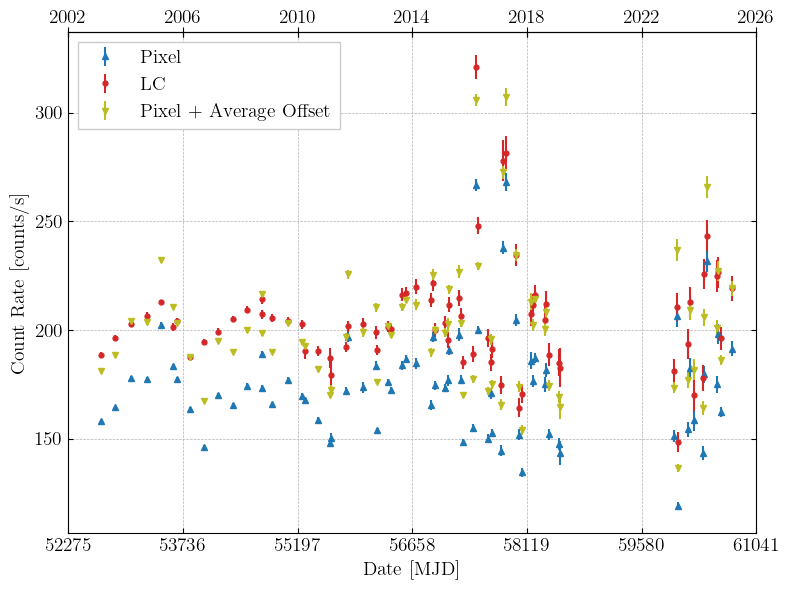

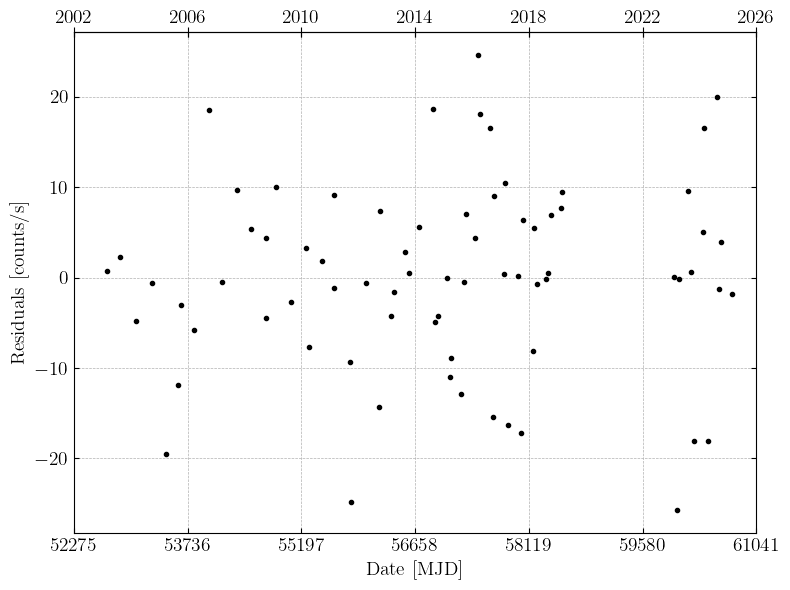

In [15]:
residuals = sorted_lc1 - (sorted_cr1 + avg_offset)
mean_rel_error = np.mean(np.abs(residuals / sorted_lc1)) * 100
print(f"Mean relative error between LC and corrected pixel method: {mean_rel_error:.2f}%")

residuals_pixel = sorted_lc1 - sorted_cr1
mean_rel_error_pixel = np.mean(np.abs(residuals_pixel / sorted_lc1)) * 100
print(f"Mean relative error between LC and pixel method: {mean_rel_error_pixel:.2f}%")

std_residuals = np.std(residuals)
mean_lc = np.mean(sorted_lc1)
rel_std = std_residuals / mean_lc * 100
print(f"Residual std vs. mean LC: {rel_std:.2f}%")

print("Average offset between LC and pixel: ", avg_offset)
print("Standard deviation of offsets: ", std_residuals)
print("Average error in LC: ", np.mean(lc1_err))

# First figure: count rates and offset
plt.figure(figsize=(8, 6))
plt.errorbar(sorted_img_times1, sorted_cr1, yerr=np.sqrt(sorted_vr1), color=colors[0], fmt='^', capsize=0, label=r'Pixel', markersize=4)
plt.errorbar(sorted_lc_times1, sorted_lc1, yerr=sorted_lc1_err, color=colors[6], fmt='.', capsize=0, label=r'LC', markersize=7)
plt.errorbar(sorted_img_times1, sorted_cr1 + sorted_cr1 * mean_rel_error_pixel/100, yerr=np.sqrt(sorted_vr1), color=colors[16], fmt='v', capsize=0, label=r'Pixel + Average Offset', markersize=4)

plt.xlabel(r"Date [MJD]", fontsize=fs)
plt.ylabel(r"Count Rate [counts/s]", fontsize=fs)
ax = plt.gca()

# Choose tick positions at years 2004, 2008, ..., 2024
target_years = np.arange(2002, 2027, 4)
target_dates = [mdates.date2num(datetime(year, 1, 1)) for year in target_years]

# Apply ticks to both axes
ax.set_xticks(target_dates)

# Format bottom x-axis (MJD)
def mpl_date_to_mjd(x, pos):
    dt = mdates.num2date(x)
    mjd = Time(dt).mjd
    return f"{mjd:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(mpl_date_to_mjd))
ax.tick_params(which='both', direction='in', labelsize=14)

# Secondary x-axis for years
secax = ax.secondary_xaxis('top')
secax.set_xticks(target_dates)

def format_year(x, pos):
    dt = mdates.num2date(x)
    return dt.strftime('%Y')

secax.xaxis.set_major_formatter(FuncFormatter(format_year))
secax.tick_params(which='both', direction='in', labelsize=14)
secax.xaxis.set_ticks_position('both')
secax.yaxis.set_ticks_position('both')
secax.grid(True, which='both', linestyle='--', linewidth=0.5)

xmin = mdates.date2num(datetime(2002, 1, 1))
xmax = mdates.date2num(datetime(2026, 1, 1))
ax.set_xlim(xmin, xmax)
plt.tick_params(which='both', labelsize=fs, direction="in")
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()

plt.savefig('../data/Figures/Crab-15-30-offset-LC.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-15-30-offset-LC.pdf', dpi=300, bbox_inches='tight')

# Second figure: offset residuals
plt.figure(figsize=(8, 6))
plt.errorbar(sorted_img_times1, residuals, color='k', fmt='.', capsize=0, label='Offset Residual')

plt.xlabel(r"Date [MJD]", fontsize=fs)
plt.ylabel(r"Residuals [counts/s]", fontsize=fs)

ax = plt.gca()

# Choose tick positions at years 2004, 2008, ..., 2024
target_years = np.arange(2002, 2027, 4)
target_dates = [mdates.date2num(datetime(year, 1, 1)) for year in target_years]

# Apply ticks to both axes
ax.set_xticks(target_dates)

# Format bottom x-axis (MJD)
def mpl_date_to_mjd(x, pos):
    dt = mdates.num2date(x)
    mjd = Time(dt).mjd
    return f"{mjd:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(mpl_date_to_mjd))
ax.tick_params(which='both', direction='in', labelsize=14)

# Secondary x-axis for years
secax = ax.secondary_xaxis('top')
secax.set_xticks(target_dates)

def format_year(x, pos):
    dt = mdates.num2date(x)
    return dt.strftime('%Y')

secax.xaxis.set_major_formatter(FuncFormatter(format_year))
secax.tick_params(which='both', direction='in', labelsize=14)
secax.xaxis.set_ticks_position('both')
secax.yaxis.set_ticks_position('both')
secax.grid(True, which='both', linestyle='--', linewidth=0.5)

xmin = mdates.date2num(datetime(2002, 1, 1))
xmax = mdates.date2num(datetime(2026, 1, 1))
ax.set_xlim(xmin, xmax)

plt.tick_params(which='both', labelsize=fs, direction="in")
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()

plt.savefig('../data/Figures/Crab-15-30-offset-LC-residuals.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-15-30-offset-LC-residuals.pdf', dpi=300, bbox_inches='tight')

Comparison with background

Number of detections (S/N > 3): 73
Number of negative detections (S/N < -3): 0



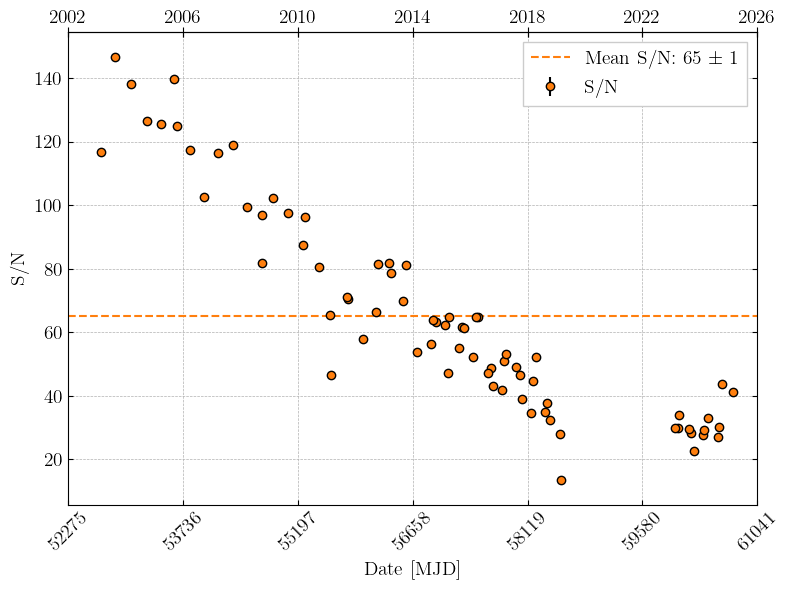

In [16]:
from uncertainties import unumpy as unp

cr1_u = unp.uarray(cr1, np.sqrt(vr1))
acr1_u = unp.uarray(acr1, np.sqrt(avr1))

signal_u = cr1_u - acr1_u
noise_u = unp.sqrt(unp.uarray(vr1 + avr1, 0)) # no error on noise

snr_u = signal_u / noise_u

# Extract nominal values and standard deviations
snr = unp.nominal_values(snr_u)
snr_err = unp.std_devs(snr_u)

detections = snr > 3
inverse_detections = snr < -3 

print("Number of detections (S/N > 3):", np.sum(detections))
print("Number of negative detections (S/N < -3):", np.sum(inverse_detections))
print()

jtable = ascii.read('../data/jupiter_table.dat')
jdates = jtable['start_date']
scws = [str(scw).zfill(12) for scw in jtable['scw_id']]

detection_times = np.array(img_times1)[detections]
detection_idxs = [np.argmin(np.abs(jdates - Time(dt).mjd)) for dt in detection_times]

# print("Detection dates: ", detection_times)
# print("Detection SCWs: ", [scws[idx] for idx in detection_idxs])

    
# Plotting S/N over time
plt.figure(figsize=(8, 6))
plt.errorbar(img_times1, snr, yerr=snr_err, fmt='o', capsize=0, label=r'S/N', markerfacecolor=colors[2], markeredgecolor='k', ecolor='k')
#plt.scatter(np.array(img_times1)[detections], snr[detections], color='r', marker='x', s=100, label=r'Detection (S/N $>$ 3)')
#plt.scatter(np.array(img_times1)[inverse_detections], snr[inverse_detections], color='magenta', marker='x', s=100, label=r'Negative Detection (S/N $<$ -3)')
#plt.axhline(3, color='darkorange', linestyle='-.', label='S/N = 3')
#plt.axhline(-3, color='darkorange', linestyle=':', label='S/N = -3')
plt.axhline(np.nanmean(snr), color=colors[2], linestyle='--', label=rf'Mean S/N: {np.nanmean(snr):.0f} $\pm$ {1}')
plt.xlabel(r"Date [MJD]", fontsize=fs)
plt.ylabel(r"S/N", fontsize=fs)

plt.legend(fontsize=fs, loc=1, fancybox=False, framealpha=1.0)

ax = plt.gca()

# Choose tick positions at years 2004, 2008, ..., 2024
target_years = np.arange(2002, 2027, 4)
target_dates = [mdates.date2num(datetime(year, 1, 1)) for year in target_years]

# Apply ticks to both axes
ax.set_xticks(target_dates)

# Format bottom x-axis (MJD)
def mpl_date_to_mjd(x, pos):
    dt = mdates.num2date(x)
    mjd = Time(dt).mjd
    return f"{mjd:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(mpl_date_to_mjd))
ax.tick_params(which='both', direction='in', labelsize=14)

# Secondary x-axis for years
secax = ax.secondary_xaxis('top')
secax.set_xticks(target_dates)

def format_year(x, pos):
    dt = mdates.num2date(x)
    return dt.strftime('%Y')

secax.xaxis.set_major_formatter(FuncFormatter(format_year))
secax.tick_params(which='both', direction='in', labelsize=14)
secax.xaxis.set_ticks_position('both')
secax.yaxis.set_ticks_position('both')
secax.grid(True, which='both', linestyle='--', linewidth=0.5)

xmin = mdates.date2num(datetime(2002, 1, 1))
xmax = mdates.date2num(datetime(2026, 1, 1))
ax.set_xlim(xmin, xmax)

plt.tick_params(which='both', labelsize=fs, direction="in")
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('../data/Figures/Crab-15-30-BSNR.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-15-30-BSNR.pdf', dpi=300, bbox_inches='tight')

### 30 - 60 keV

Prepare the data

In [17]:
# Parse times
img_times2 = np.array([datetime.strptime(date, "%Y-%m-%dT%H:%M:%S") for date in date2])

# Mask where all data are non-zero
mask_img = cr2 != 0

# Apply mask
cr2 = cr2[mask_img]
acr2 = acr2[mask_img]
cr2_psf = cr2_psf[mask_img]
cr2_cpsf = cr2_cpsf[mask_img]
vr2 = vr2[mask_img]
avr2 = avr2[mask_img]
img_times2 = img_times2[mask_img]

# Averages and std deviations
avg_cr2 = np.mean(cr2)
std_cr2 = np.std(cr2)
avg_psf2 = np.mean(cr2_psf)
std_psf2 = np.std(cr2_psf)
avg_cpsf2 = np.mean(cr2_cpsf)
std_cpsf2 = np.std(cr2_cpsf)

# Sort both time arrays along with their corresponding data arrays
sorted_img_times2, sorted_cr2, sorted_vr2 = zip(*sorted(zip(img_times2, cr2, vr2)))

# Convert to NumPy arrays
sorted_img_times2 = np.array(sorted_img_times2)
sorted_cr2 = np.array(sorted_cr2)
sorted_vr2 = np.array(sorted_vr2)

# Yearly averages of cr2
yearly_avg_cr2 = []
yearly_avg_vr2 = []

# Group by year
for year in range(2004, 2024):
    # Get the indices of the dates that fall within the current year
    indices = [i for i, date in enumerate(sorted_img_times2) if date.year == year]
    
    # Calculate the average for the current year
    if indices:
        yearly_avg_cr2.append(np.mean(sorted_cr2[indices][sorted_cr2[indices] > 0]))
        yearly_avg_vr2.append(np.mean(sorted_vr2[indices][sorted_vr2[indices] > 0]))
    else:
        yearly_avg_cr2.append(np.nan)
        yearly_avg_vr2.append(np.nan)


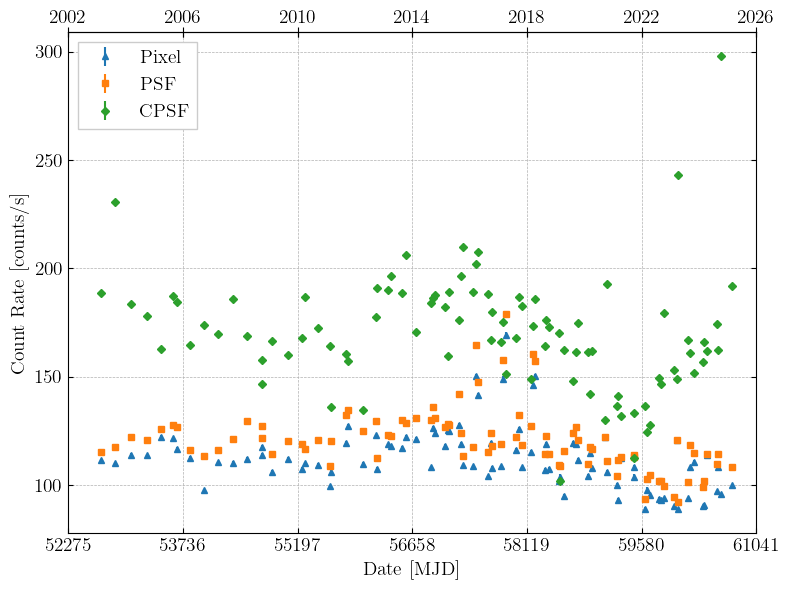

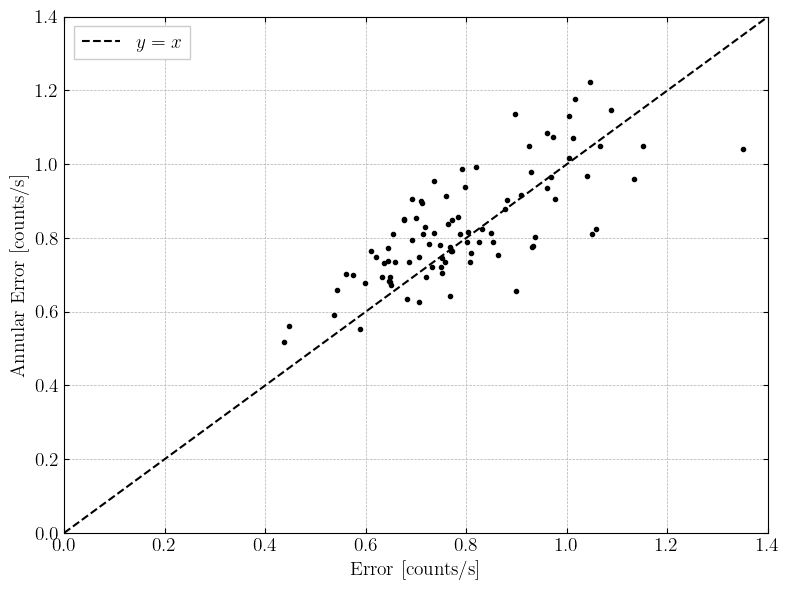

In [18]:
# --- Count Rate vs Time Plot ---
plt.figure(figsize=(8, 6))

plt.errorbar(img_times2, cr2, yerr=np.sqrt(vr2), color=colors[0], fmt='^', capsize=0, label=r'Pixel', markersize=4)
plt.errorbar(img_times2, cr2_psf, yerr=np.sqrt(vr2), color=colors[2], fmt='s', capsize=0, label=r'PSF', markersize=4)
plt.errorbar(img_times2, cr2_cpsf, yerr=np.sqrt(vr2), color=colors[4], fmt='D', capsize=0, label=r'CPSF', markersize=4)

# Optional horizontal average lines (uncomment if desired)
#plt.axhline(avg_cr2, color='indianred', linestyle='--')
#plt.axhline(avg_psf2, color='limegreen', linestyle='-.')
#plt.axhline(avg_cpsf2, color='royalblue', linestyle=':')

plt.xlabel(r'Date [MJD]', fontsize=fs)
plt.ylabel(r'Count Rate [counts/s]', fontsize=fs)
ax = plt.gca()

# Choose tick positions at years 2004, 2008, ..., 2024
target_years = np.arange(2002, 2027, 4)
target_dates = [mdates.date2num(datetime(year, 1, 1)) for year in target_years]

# Apply ticks to both axes
ax.set_xticks(target_dates)

# Format bottom x-axis (MJD)
def mpl_date_to_mjd(x, pos):
    dt = mdates.num2date(x)
    mjd = Time(dt).mjd
    return f"{mjd:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(mpl_date_to_mjd))
ax.tick_params(which='both', direction='in', labelsize=14)

# Secondary x-axis for years
secax = ax.secondary_xaxis('top')
secax.set_xticks(target_dates)

def format_year(x, pos):
    dt = mdates.num2date(x)
    return dt.strftime('%Y')

secax.xaxis.set_major_formatter(FuncFormatter(format_year))
secax.tick_params(which='both', direction='in', labelsize=14)
secax.xaxis.set_ticks_position('both')
secax.yaxis.set_ticks_position('both')
secax.grid(True, which='both', linestyle='--', linewidth=0.5)

xmin = mdates.date2num(datetime(2002, 1, 1))
xmax = mdates.date2num(datetime(2026, 1, 1))
ax.set_xlim(xmin, xmax)
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()

plt.savefig('../data/Figures/Crab-30-60-raw-LC.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-30-60-raw-LC.pdf', dpi=300, bbox_inches='tight')


# --- Error vs Annular Error Plot ---
plt.figure(figsize=(8, 6))

x = np.linspace(0, np.max(np.sqrt(vr2))+1, 100)
plt.plot(x, x, color='k', linestyle='--', label=r'$y = x$')
plt.errorbar(np.sqrt(vr2), np.sqrt(avr2), fmt='.', capsize=0, color='k')

plt.xlabel(r'Error [counts/s]', fontsize=fs)
plt.ylabel(r'Annular Error [counts/s]', fontsize=fs)

plt.ylim(0, 1.4)
plt.xlim(0, 1.4)

plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left', fancybox=False, framealpha=1.0)
plt.tight_layout()

plt.savefig('../data/Figures/Crab-30-60-error-comparison.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-30-60-error-comparison.pdf', dpi=300, bbox_inches='tight')

In [55]:
# Your existing code:
df = pd.DataFrame({
    'date': img_times2,
    'flux': cr2
})
df['year'] = df['date'].dt.year

# Group by year and compute mean flux
yearly_flux = df.groupby('year')['flux'].mean()

# Sort by year
yearly_flux = yearly_flux.sort_index()

# Compute year-over-year percentage variation
percent_variations = 100 * (yearly_flux.diff() / yearly_flux.shift(1)).dropna()

# Compute means for different periods
mean_variation_2001_2011 = percent_variations.loc[2001:2010].mean()
mean_variation_after_2011 = percent_variations.loc[2011:].mean()
mean_variation_all = percent_variations.mean()

# Print results
print(f"Mean variation 2001-2011: {mean_variation_2001_2011:.2f}%")
print(f"Mean variation after 2011: {mean_variation_after_2011:.2f}%")
print(f"Mean variation all years: {mean_variation_all:.2f}%")

# Now compute the decline between August 2008 and August 2010
start_date = pd.to_datetime("2008-08-01")
end_date = pd.to_datetime("2010-08-01")

# Filter the data between these dates
df_period = df[(df['date'] >= start_date) & (df['date'] <= end_date)].sort_values('date')

if not df_period.empty:
    initial_flux = df_period.iloc[0]['flux']
    final_flux = df_period.iloc[-1]['flux']
    decline_percentage = 100 * (initial_flux - final_flux) / initial_flux
    print(f"Flux decline from August 2008 to August 2010: {decline_percentage:.2f}%")
else:
    print("No data available between August 2008 and August 2010.")


Mean variation 2001-2011: -0.05%
Mean variation after 2011: -0.41%
Mean variation all years: -0.29%
Flux decline from August 2008 to August 2010: 3.38%


In [56]:
(2.95+3.38)/2

3.165

In [19]:
np.mean(sorted_cr2 + avg_offset), np.std(sorted_cr2 + avg_offset)

(142.06376168766155, 14.296381564554059)

Number of detections (S/N > 3): 93
Number of negative detections (S/N < -3): 0



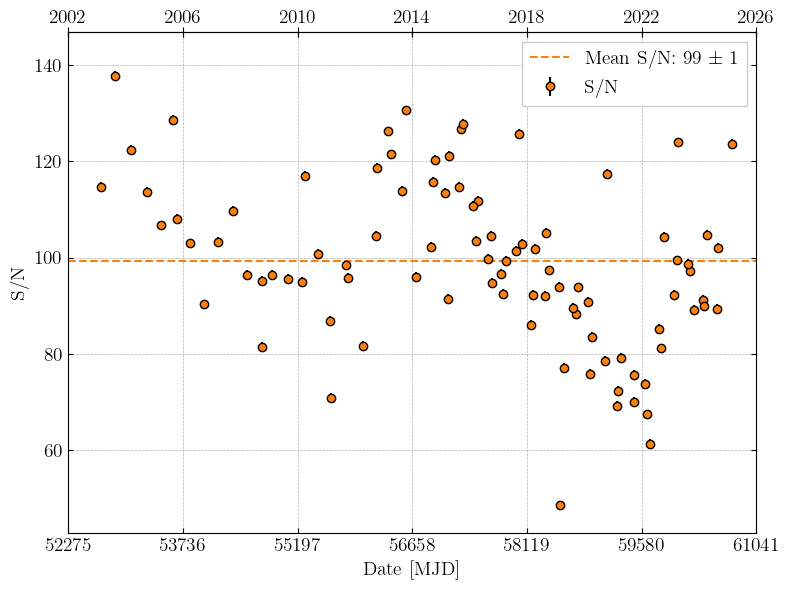

In [20]:
from uncertainties import unumpy as unp

cr2_u = unp.uarray(cr2, np.sqrt(vr2))
acr2_u = unp.uarray(acr2, np.sqrt(avr2))

signal_u = cr2_u - acr2_u
noise_u = unp.sqrt(unp.uarray(vr2 + avr2, 0)) # no error on noise

snr_u = signal_u / noise_u

# Extract nominal values and standard deviations
SNR = unp.nominal_values(snr_u)
snr_err = unp.std_devs(snr_u)

detections = SNR > 3
inverse_detections = SNR < -3

print("Number of detections (S/N > 3):", np.sum(detections))
print("Number of negative detections (S/N < -3):", np.sum(inverse_detections))
print()

# Matching SCWs for detections
jtable = ascii.read('../data/jupiter_table.dat')
jdates = jtable['start_date']
scws = [str(scw).zfill(12) for scw in jtable['scw_id']]

detection_times = np.array(img_times2)[detections]
detection_idxs = [np.argmin(np.abs(jdates - Time(dt).mjd)) for dt in detection_times]

# --- Plot SNR over Time ---
plt.figure(figsize=(8, 6))

plt.errorbar(img_times2, SNR, yerr=snr_err, fmt='o', capsize=0,
             markerfacecolor=colors[2], markeredgecolor='k', ecolor='k', label=r'S/N')

#plt.scatter(np.array(img_times2)[detections], SNR[detections], color='r', marker='x', s=70, label=r'Detection ($\mathrm{S/N} > 3$)')
#plt.scatter(np.array(img_times2)[inverse_detections], SNR[inverse_detections], color='magenta', marker='x', s=70, label=r'Negative ($\mathrm{S/N} < -3$)')

#plt.axhline(3, color='darkorange', linestyle='-.', label=r'$\mathrm{S/N} = 3$')
#plt.axhline(-3, color='darkorange', linestyle=':', label=r'$\mathrm{S/N} = -3$')
plt.axhline(np.nanmean(SNR), color=colors[2], linestyle='--', label=rf'Mean S/N: {np.nanmean(SNR):.0f} $\pm$ {1}')

plt.xlabel(r'Date [MJD]', fontsize=fs)
plt.ylabel(r'S/N', fontsize=fs)

ax = plt.gca()

# Choose tick positions at years 2004, 2008, ..., 2024
target_years = np.arange(2002, 2027, 4)
target_dates = [mdates.date2num(datetime(year, 1, 1)) for year in target_years]

# Apply ticks to both axes
ax.set_xticks(target_dates)

# Format bottom x-axis (MJD)
def mpl_date_to_mjd(x, pos):
    dt = mdates.num2date(x)
    mjd = Time(dt).mjd
    return f"{mjd:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(mpl_date_to_mjd))
ax.tick_params(which='both', direction='in', labelsize=14)

# Secondary x-axis for years
secax = ax.secondary_xaxis('top')
secax.set_xticks(target_dates)

def format_year(x, pos):
    dt = mdates.num2date(x)
    return dt.strftime('%Y')

secax.xaxis.set_major_formatter(FuncFormatter(format_year))
secax.tick_params(which='both', direction='in', labelsize=14)
secax.xaxis.set_ticks_position('both')
secax.yaxis.set_ticks_position('both')
secax.grid(True, which='both', linestyle='--', linewidth=0.5)

xmin = mdates.date2num(datetime(2002, 1, 1))
xmax = mdates.date2num(datetime(2026, 1, 1))
ax.set_xlim(xmin, xmax)
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper right', fancybox=False, framealpha=1.0)
plt.tight_layout()

plt.savefig('../data/Figures/Crab-30-60-BSNR.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-30-60-BSNR.pdf', dpi=300, bbox_inches='tight')

### 3 - 15 keV

Prepare the data

In [21]:
# Parse times
img_times3 = np.array([datetime.strptime(date, "%Y-%m-%dT%H:%M:%S.%f") for date in date3])

# Mask where all data are non-zero
mask_img = cr3 != 0

# Apply mask
cr3 = cr3[mask_img]
acr3 = acr3[mask_img]
cr3_psf = cr3_psf[mask_img]
cr3_cpsf = cr3_cpsf[mask_img]
vr3 = vr3[mask_img]
avr3 = avr3[mask_img]
img_times3 = img_times3[mask_img]

# Averages and std deviations
avg_cr3 = np.mean(cr3)
std_cr3 = np.std(cr3)
avg_psf3 = np.mean(cr3_psf)
std_psf3 = np.std(cr3_psf)
avg_cpsf3 = np.mean(cr3_cpsf)
std_cpsf3 = np.std(cr3_cpsf)

# Sort both time arrays along with their corresponding data arrays
sorted_img_times3, sorted_cr3, sorted_vr3 = zip(*sorted(zip(img_times3, cr3, vr3)))

# Convert to NumPy arrays
sorted_img_times3 = np.array(sorted_img_times3)
sorted_cr3 = np.array(sorted_cr3)
sorted_vr3 = np.array(sorted_vr3)

# Yearly averages of cr3
yearly_avg_cr3 = []
yearly_avg_vr3 = []

# Group by year
for year in range(2004, 2024):
    # Get the indices of the dates that fall within the current year
    indices = [i for i, date in enumerate(sorted_img_times3) if date.year == year]
    
    # Calculate the average for the current year
    if indices:
        yearly_avg_cr3.append(np.mean(sorted_cr3[indices][sorted_cr3[indices] > 0]))
        yearly_avg_vr3.append(np.mean(sorted_vr3[indices][sorted_vr3[indices] > 0]))
    else:
        yearly_avg_cr3.append(np.nan)
        yearly_avg_vr3.append(np.nan)

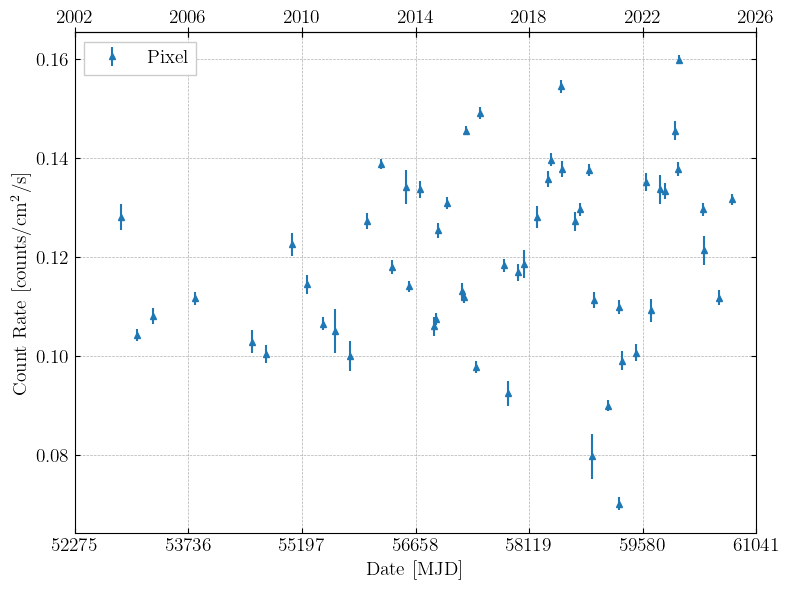

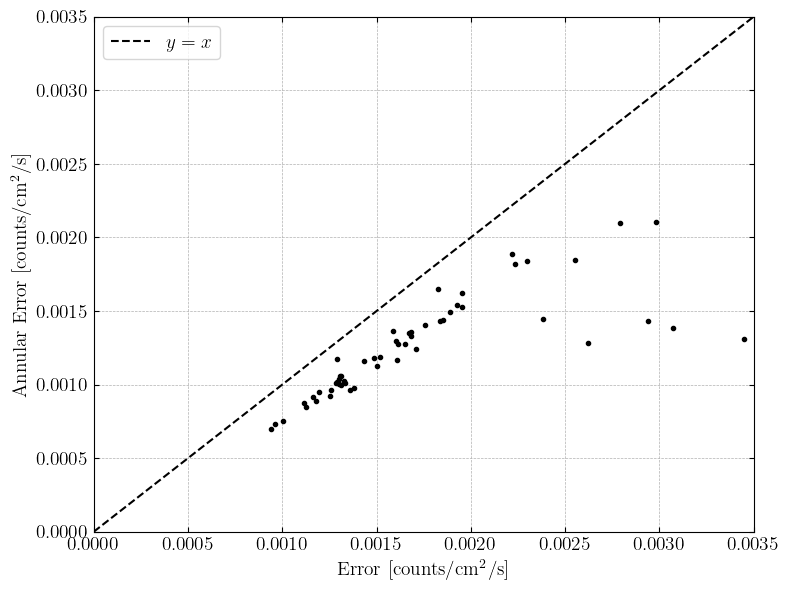

In [22]:
# --- Plot: Count Rate vs. Time ---
plt.figure(figsize=(8, 6))

plt.errorbar(img_times3, cr3, yerr=np.sqrt(vr3), color=colors[0], fmt='^', capsize=0, label=r'Pixel', markersize=5)
#plt.errorbar(img_times3, cr3_psf, yerr=np.sqrt(vr3), color=colors[2], fmt='s', capsize=0, label=r'PSF', markersize=4)
#plt.errorbar(img_times3, cr3_cpsf, yerr=np.sqrt(vr3), color=colors[4], fmt='D', capsize=0, label=r'CPSF', markersize=4)

#plt.axhline(avg_cr3, color='crimson', linestyle='--', linewidth=1)
# plt.axhline(avg_psf3, color='seagreen', linestyle='-.', linewidth=1)
# plt.axhline(avg_cpsf3, color='royalblue', linestyle=':', linewidth=1)

plt.xlabel(r'Date [MJD]', fontsize=fs)
plt.ylabel(r'Count Rate [counts/cm$^2$/s]', fontsize=fs)
ax = plt.gca()

# Choose tick positions at years 2004, 2008, ..., 2024
target_years = np.arange(2002, 2027, 4)
target_dates = [mdates.date2num(datetime(year, 1, 1)) for year in target_years]

# Apply ticks to both axes
ax.set_xticks(target_dates)

# Format bottom x-axis (MJD)
def mpl_date_to_mjd(x, pos):
    dt = mdates.num2date(x)
    mjd = Time(dt).mjd
    return f"{mjd:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(mpl_date_to_mjd))
ax.tick_params(which='both', direction='in', labelsize=14)

# Secondary x-axis for years
secax = ax.secondary_xaxis('top')
secax.set_xticks(target_dates)

def format_year(x, pos):
    dt = mdates.num2date(x)
    return dt.strftime('%Y')

secax.xaxis.set_major_formatter(FuncFormatter(format_year))
secax.tick_params(which='both', direction='in', labelsize=14)
secax.xaxis.set_ticks_position('both')
secax.yaxis.set_ticks_position('both')
secax.grid(True, which='both', linestyle='--', linewidth=0.5)

xmin = mdates.date2num(datetime(2002, 1, 1))
xmax = mdates.date2num(datetime(2026, 1, 1))
ax.set_xlim(xmin, xmax)

plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='best', fancybox=False, framealpha=1.0)
plt.tight_layout()

plt.savefig('../data/Figures/Crab-3-15-raw-LC.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-3-15-raw-LC.pdf', dpi=300, bbox_inches='tight')

# --- Plot: Annular Error vs. Pixel Error ---
plt.figure(figsize=(8, 6))

x = np.linspace(0, np.max(np.sqrt(vr3)), 100)
plt.plot(x, x, color='k', linestyle='--', label=r'$y = x$')

plt.errorbar(np.sqrt(vr3), np.sqrt(avr3), fmt='.', capsize=0, color='k', ecolor='k')

plt.ylim(0, 0.0035)
plt.xlim(0, 0.0035)

plt.xlabel(r'Error [counts/cm$^2$/s]', fontsize=fs)
plt.ylabel(r'Annular Error [counts/cm$^2$/s]', fontsize=fs)
plt.tick_params(which='both', labelsize=fs, direction='in')
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=fs, loc='upper left')
plt.tight_layout()

plt.savefig('../data/Figures/Crab-3-15-error-comparison.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-3-15-error-comparison.pdf', dpi=300, bbox_inches='tight')

In [35]:
# Group by year using pandas for convenience
df = pd.DataFrame({
    'date': img_times3,
    'flux': cr3
})
df['year'] = df['date'].dt.year

# Group by year and compute mean flux
yearly_flux = df.groupby('year')['flux'].mean()

# Sort by year
yearly_flux = yearly_flux.sort_index()

# Compute year-over-year percentage variation
percent_variations = 100 * (yearly_flux.diff() / yearly_flux.shift(1)).dropna()

# Compute means for different periods
mean_variation_2001_2011 = percent_variations.loc[2001:2011].mean()
mean_variation_after_2011 = percent_variations.loc[2012:].mean()
mean_variation_all = percent_variations.mean()

# Print results
print(f"Mean variation 2001-2011: {mean_variation_2001_2011:.2f}%")
print(f"Mean variation after 2011: {mean_variation_after_2011:.2f}%")
print(f"Mean variation all years: {mean_variation_all:.2f}%")

Mean variation 2001-2011: -2.91%
Mean variation after 2011: 3.13%
Mean variation all years: 1.32%


In [23]:
np.mean(sorted_cr3 + sorted_cr3 * mean_rel_error_pixel/100), np.std(sorted_cr3 + sorted_cr3 * mean_rel_error_pixel/100)

(0.13721632484871835, 0.020829977350122233)

Number of detections (S/N > 3): 56
Number of negative detections (S/N < -3): 0



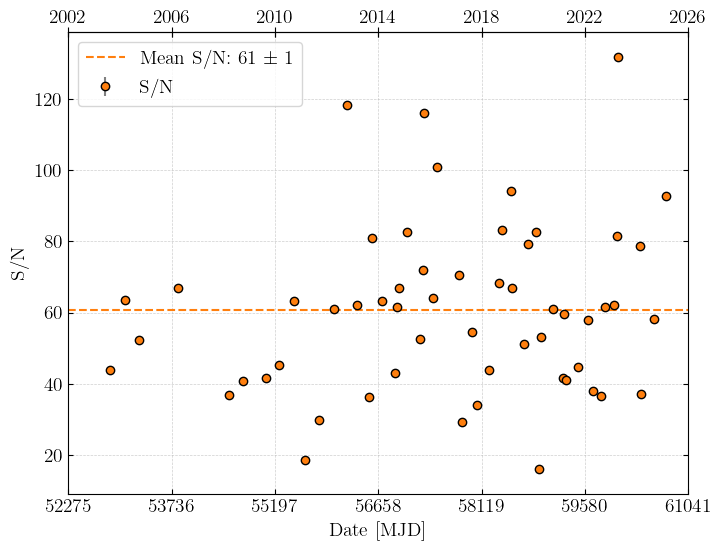

In [24]:
from uncertainties import unumpy as unp

cr3_u = unp.uarray(cr3, np.sqrt(vr3))
acr3_u = unp.uarray(acr3, np.sqrt(avr3))

signal_u = cr3_u - acr3_u
noise_u = unp.sqrt(unp.uarray(vr3 + avr3, 0)) # no error on noise

snr_u = signal_u / noise_u

# Extract nominal values and standard deviations
SNR = unp.nominal_values(snr_u)
snr_err = unp.std_devs(snr_u)

detections = SNR > 3
inverse_detections = SNR < -3 

print("Number of detections (S/N > 3):", np.sum(detections))
print("Number of negative detections (S/N < -3):", np.sum(inverse_detections))
print()

jtable = ascii.read('../data/jupiter_table.dat')
jdates = jtable['start_date']
scws = [str(scw).zfill(12) for scw in jtable['scw_id']]

detection_times = np.array(img_times3)[detections]
detection_idxs = [np.argmin(np.abs(jdates - Time(dt).mjd)) for dt in detection_times]

# print("Detection dates: ", detection_times)
# print("Detection SCWs: ", [scws[idx] for idx in detection_idxs])


plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fs = 14  # base font size

plt.figure(figsize=(8, 6))

# Main S/N data points
plt.errorbar(
    img_times3, 
    SNR, 
    yerr=snr_err, 
    fmt='o', 
    capsize=0, 
    markerfacecolor=colors[2], 
    markeredgecolor='k', 
    ecolor='gray', 
    label=r'S/N',
)

# Detections: S/N > 3
#plt.scatter(np.array(img_times3)[detections], SNR[detections], color='crimson', marker='x', s=100, label=r'Detection ($\mathrm{S/N} > 3$)')

# Negative detections: S/N < -3
#plt.scatter(np.array(img_times3)[inverse_detections], SNR[inverse_detections], color='magenta', marker='x', s=100, label=r'Negative Detection ($\mathrm{S/N} < -3$)')

# Reference lines
#plt.axhline(3, color='darkorange', linestyle='-.', label=r'$\mathrm{S/N} = 3$')
#plt.axhline(-3, color='darkorange', linestyle=':', label=r'$\mathrm{S/N} = -3$')
plt.axhline(np.nanmean(SNR), color=colors[2], linestyle='--', label=rf'Mean S/N: {np.nanmean(SNR):.0f} $\pm$ {1}')

# Labels and formatting
plt.xlabel(r'Date [MJD]', fontsize=fs)
plt.ylabel(r'S/N', fontsize=fs)
ax = plt.gca()

# Choose tick positions at years 2004, 2008, ..., 2024
target_years = np.arange(2002, 2027, 4)
target_dates = [mdates.date2num(datetime(year, 1, 1)) for year in target_years]

# Apply ticks to both axes
ax.set_xticks(target_dates)

# Format bottom x-axis (MJD)
def mpl_date_to_mjd(x, pos):
    dt = mdates.num2date(x)
    mjd = Time(dt).mjd
    return f"{mjd:.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(mpl_date_to_mjd))
ax.tick_params(which='both', direction='in', labelsize=14)

# Secondary x-axis for years
secax = ax.secondary_xaxis('top')
secax.set_xticks(target_dates)

def format_year(x, pos):
    dt = mdates.num2date(x)
    return dt.strftime('%Y')

secax.xaxis.set_major_formatter(FuncFormatter(format_year))
secax.tick_params(which='both', direction='in', labelsize=14)
secax.xaxis.set_ticks_position('both')
secax.yaxis.set_ticks_position('both')
secax.grid(True, which='both', linestyle='--', linewidth=0.5)

xmin = mdates.date2num(datetime(2002, 1, 1))
xmax = mdates.date2num(datetime(2026, 1, 1))
ax.set_xlim(xmin, xmax)

plt.tick_params(which='both', direction='in', labelsize=fs)
plt.gca().xaxis.set_ticks_position('both')
plt.gca().yaxis.set_ticks_position('both')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.legend(fontsize=fs, loc='upper left')

plt.savefig('../data/Figures/Crab-3-15-BSNR.pdf', dpi=300, bbox_inches='tight')
plt.savefig('/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/Crab-3-15-BSNR.pdf', dpi=300, bbox_inches='tight')

## Weighted averages (all energy bands)

In [25]:
# Calculate weighted averages for 15 - 30 keV
total_15_30, yearly_15_30 = weighted_avg(img_times1, cr1, vr1)

# Calculate weighted averages for 30 - 60 keV
total_30_60, yearly_30_60 = weighted_avg(img_times2, cr2, vr2)

# Calculate weighted averages for 3 - 15 keV
total_3_15, yearly_3_15 = weighted_avg(img_times3, cr3, vr3)

Yearly weighted means:
2003: 0.1281 ± 0.0026 counts/s
2004: 0.1057 ± 0.0010 counts/s
2006: 0.1117 ± 0.0014 counts/s
2008: 0.1013 ± 0.0014 counts/s
2009: 0.1225 ± 0.0023 counts/s
2010: 0.1090 ± 0.0011 counts/s
2011: 0.1016 ± 0.0025 counts/s
2012: 0.1360 ± 0.0008 counts/s
2013: 0.1167 ± 0.0009 counts/s
2014: 0.1175 ± 0.0008 counts/s
2015: 0.1294 ± 0.0006 counts/s
2016: 0.1238 ± 0.0008 counts/s
2017: 0.1146 ± 0.0009 counts/s
2018: 0.1363 ± 0.0009 counts/s
2019: 0.1389 ± 0.0007 counts/s
2020: 0.1102 ± 0.0007 counts/s
2021: 0.0924 ± 0.0008 counts/s
2022: 0.1289 ± 0.0010 counts/s
2023: 0.1515 ± 0.0007 counts/s
2024: 0.1220 ± 0.0009 counts/s
2025: 0.1317 ± 0.0011 counts/s
Yearly weighted means:
2003: 161.5728 ± 0.5608 counts/s
2004: 177.7961 ± 0.6983 counts/s
2005: 185.7823 ± 0.6005 counts/s
2006: 154.5192 ± 0.6707 counts/s
2007: 167.7344 ± 0.6891 counts/s
2008: 177.9971 ± 0.8013 counts/s
2009: 170.1336 ± 0.7985 counts/s
2010: 165.8518 ± 0.7459 counts/s
2011: 161.7835 ± 0.9108 counts/s
2012: 

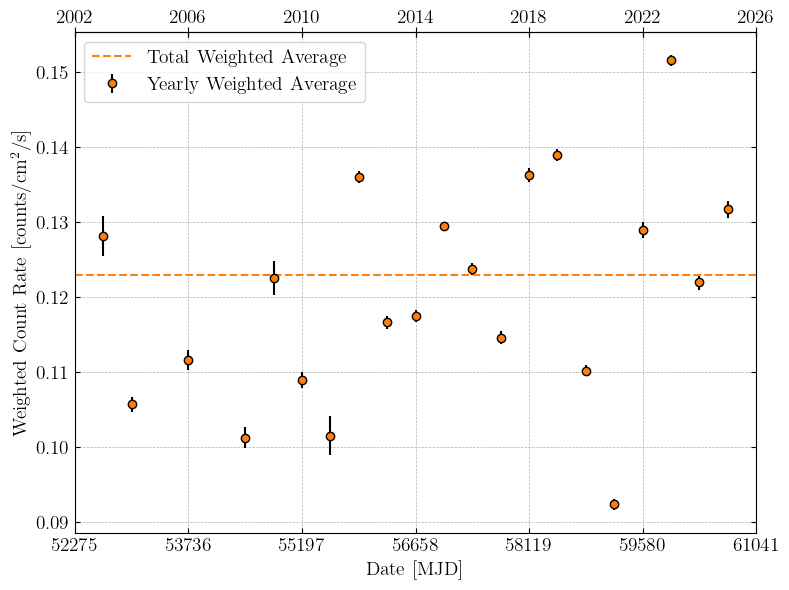

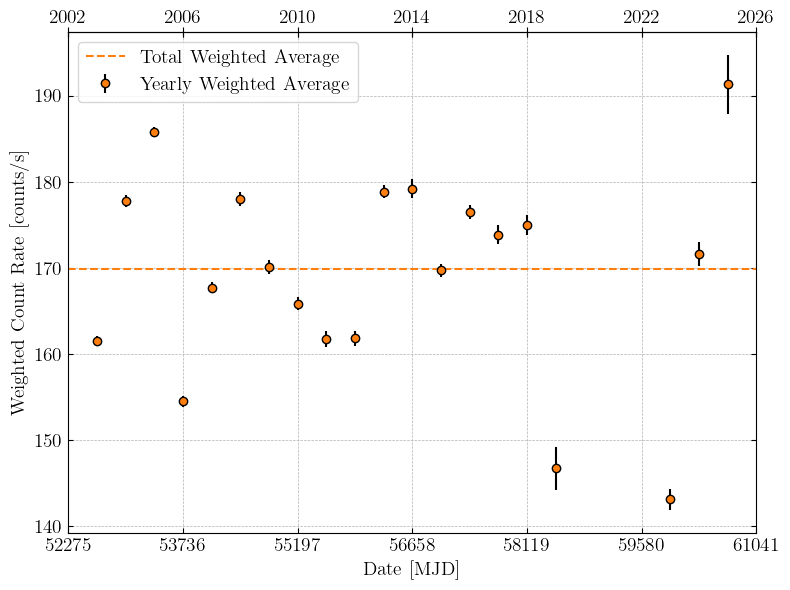

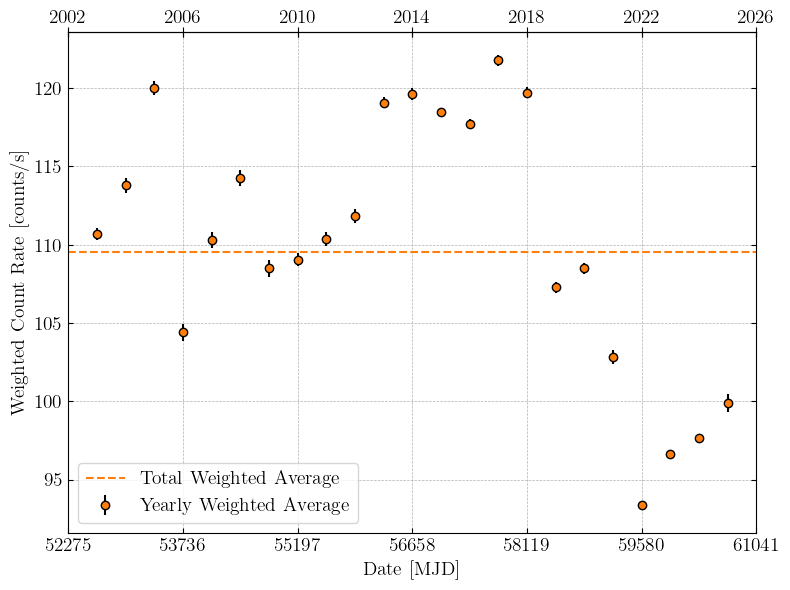

In [26]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fs = 14  # Font size

def plot_weighted_crab(yearly_data, total_data, color='royalblue', jemx=False, save=False, save_name=None):
    years = list(yearly_data.keys())
    # Convert years (int) to matplotlib dates (float)
    years_dates = [mdates.date2num(datetime(year, 1, 1)) for year in years]

    means = [result['weighted_mean'] for result in yearly_data.values()]
    stds = [result['weighted_std'] for result in yearly_data.values()]
    
    plt.figure(figsize=(8, 6))
    plt.errorbar(
        years_dates, means, yerr=stds, fmt='o', capsize=0, color=color, 
        ecolor='k', elinewidth=1.5, markeredgecolor='k', label=r'Yearly Weighted Average'
    )
    
    # For the horizontal line, no change
    plt.axhline(total_data['weighted_mean'], color=color, linestyle='--', label=r'Total Weighted Average')

    plt.xlabel(r'Date [MJD]', fontsize=fs)
    ylabel = r'Weighted Count Rate [counts/cm$^2$/s]' if jemx else r'Weighted Count Rate [counts/s]'
    plt.ylabel(ylabel, fontsize=fs)

    ax = plt.gca()

    # Set ticks on years (converted to matplotlib dates)
    target_years = np.arange(2002, 2027, 4)
    target_dates = [mdates.date2num(datetime(year, 1, 1)) for year in target_years]
    ax.set_xticks(target_dates)

    # Format bottom x-axis: convert mpl date to MJD
    def mpl_date_to_mjd(x, pos):
        dt = mdates.num2date(x)
        mjd = Time(dt).mjd
        return f"{mjd:.0f}"

    ax.xaxis.set_major_formatter(FuncFormatter(mpl_date_to_mjd))
    ax.tick_params(which='both', direction='in', labelsize=fs)

    # Secondary axis showing years
    secax = ax.secondary_xaxis('top')
    secax.set_xticks(target_dates)

    def format_year(x, pos):
        dt = mdates.num2date(x)
        return dt.strftime('%Y')

    secax.xaxis.set_major_formatter(FuncFormatter(format_year))
    secax.tick_params(which='both', direction='in', labelsize=fs)
    secax.xaxis.set_ticks_position('both')
    secax.yaxis.set_ticks_position('both')
    secax.grid(True, which='both', linestyle='--', linewidth=0.5)

    xmin = mdates.date2num(datetime(2002, 1, 1))
    xmax = mdates.date2num(datetime(2026, 1, 1))
    ax.set_xlim(xmin, xmax)

    plt.tick_params(which='both', direction='in', labelsize=fs)
    ax.xaxis.set_ticks_position('both')
    ax.yaxis.set_ticks_position('both')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.legend(fontsize=fs)
    plt.tight_layout()

    if save:
        plt.savefig(f'../data/Figures/{save_name}.pdf', dpi=300, bbox_inches='tight')
        plt.savefig(f'/mnt/c/Users/luoji/Desktop/Master EPFL/TPIVb/Figures/{save_name}.pdf', dpi=300, bbox_inches='tight')

# Apply to each energy band
print_results = True

plot_weighted_crab(yearly_3_15, total_3_15, color=colors[2], jemx=True, save=True, save_name='Crab-3-15-yearly-LC')
if print_results:
    print(f"Yearly weighted means:")
    for year, result in yearly_3_15.items():
        print(f"{year}: {result['weighted_mean']:.4f} ± {result['weighted_std']:.4f} counts/s")

plot_weighted_crab(yearly_15_30, total_15_30, color=colors[2], jemx=False, save=True, save_name='Crab-15-30-yearly-LC')
if print_results:
    print(f"Yearly weighted means:")
    for year, result in yearly_15_30.items():
        print(f"{year}: {result['weighted_mean']:.4f} ± {result['weighted_std']:.4f} counts/s")

plot_weighted_crab(yearly_30_60, total_30_60, color=colors[2], jemx=False, save=True, save_name='Crab-30-60-yearly-LC')
if print_results:
    print(f"Yearly weighted means:")
    for year, result in yearly_30_60.items():
        print(f"{year}: {result['weighted_mean']:.4f} ± {result['weighted_std']:.4f} counts/s")

# Save weighted averages to a file
save = False
if save:
    with open('../data/weighted_crab_averages.txt', 'w') as f:
        f.write("Energy Band\tYear\tWeighted Mean\tWeighted Std\n")
        for year, result in yearly_3_15.items():
            f.write(f"3-15 keV\t{year}\t{result['weighted_mean']:.4f}\t{result['weighted_std']:.4f}\n")
        for year, result in yearly_15_30.items():
            f.write(f"15-30 keV\t{year}\t{result['weighted_mean']:.4f}\t{result['weighted_std']:.4f}\n")
        for year, result in yearly_30_60.items():
            f.write(f"30-60 keV\t{year}\t{result['weighted_mean']:.4f}\t{result['weighted_std']:.4f}\n")

In [51]:
# Group by year using pandas for convenience
df = pd.DataFrame({
    'date': [mdates.date2num(datetime(year, 1, 1)) for year in list(yearly_30_60.keys())],
    'flux': [result['weighted_mean'] for result in yearly_30_60.values()]
})

df['year'] = pd.to_datetime(mdates.num2date(df['date'])).year

# Sort by year
df = df.sort_values('year').reset_index(drop=True)

# Compute year-over-year percentage variation
df['pct_variation'] = 100 * df['flux'].diff() / df['flux'].shift(1)

# Remove the first NaN row
df = df.dropna(subset=['pct_variation'])

# Compute means for different periods
mean_variation_2001_2011 = df.loc[(df['year'] >= 2001) & (df['year'] <= 2010), 'pct_variation'].mean()
mean_variation_after_2011 = df.loc[df['year'] > 2010, 'pct_variation'].mean()
mean_variation_all = df['pct_variation'].mean()

# Print results
print(f"Mean variation 2001-2011: {mean_variation_2001_2011:.2f}%")
print(f"Mean variation after 2011: {mean_variation_after_2011:.2f}%")
print(f"Mean variation all years: {mean_variation_all:.2f}%")

Mean variation 2001-2011: -0.01%
Mean variation after 2011: -0.48%
Mean variation all years: -0.33%


In [52]:
(0.78+0.01)/2, (1.58+0.48)/2

(0.395, 1.03)